# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
query_url = url + "appid=" + api_key + "&q=" + 'San Jose'
r = requests.get(query_url).json()
print(r)

{'coord': {'lon': -121.89, 'lat': 37.34}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 285.39, 'feels_like': 284.12, 'temp_min': 282.59, 'temp_max': 288.71, 'pressure': 1019, 'humidity': 76}, 'visibility': 16093, 'wind': {'speed': 1.19, 'deg': 330}, 'clouds': {'all': 5}, 'dt': 1581043999, 'sys': {'type': 1, 'id': 5903, 'country': 'US', 'sunrise': 1581001599, 'sunset': 1581039397}, 'timezone': -28800, 'id': 5392171, 'name': 'San Jose', 'cod': 200}


In [20]:
api_key = "5982138c45190b549382b2e32b7e6ac5"
url = 'http://api.openweathermap.org/data/2.5/weather?'

dfw = pd.DataFrame(columns = ['Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lon', 'Max Temp', 'Wind Speed'])

for indx, city in enumerate(cities):
    # Build query URL
    query_url = url + "appid=" + api_key + "&q=" + city
    #print('URL:', query_url)
    r = requests.get(query_url)

    d = r.json()
    if d['cod'] != 200:
        continue # bad reply, go to next city
    name = d['name']
    print(name)
    clouds = d['clouds']['all']
    country = d['sys']['country']
    date = d['dt']
    city_id = d['id']
    humidity = d['main']['humidity']
    max_temp = d['main']['temp_max']
    lng = d['coord']['lon']
    lat = d['coord']['lat']
    wind = d['wind']['speed']
    wdict = {'Cloudiness':clouds, 'Country':country, 'Date':date, 
          'Humidity':humidity, 'Lat':lat, 'Lon':lng, 'Max Temp':max_temp, 'Wind Speed':wind}
    df2 = pd.DataFrame(wdict, index=[city])
    dfw = dfw.append(df2)

Khorinsk
Rikitea
Guerrero Negro
Ploemeur
Albany
Concarneau
Qaanaaq
Kapaa
Mataura
Cadillac
Tekari
Olinda
Avarua
George Town
Port Alfred
Broome
Pasni
Mahebourg
Geraldton
Nazas
Carnarvon
Pisco
Ribeira Grande
Hilo
Chokurdakh
Hobart
Alyangula
Cocobeach
Vaini
Samarai
Vestmannaeyjar
Punta Arenas
Berdigestyakh
Puerto Colombia
Xining
Sampit
Ponta do Sol
Saldanha
Hobyo
Kavieng
Bathsheba
Avanuorri
Sao Filipe
Ushuaia
Nanortalik
Ponta Delgada
Fare
Srednekolymsk
Margate
Hermanus
Sisimiut
Torbay
Busselton
Gerash
Bethel
Anadyr
Matamba
Atuona
Longyearbyen
Hithadhoo
Inhambane
Jamestown
Dikson
Thompson
Upernavik
Burns Lake
Kjollefjord
Chernyshevskiy
Shingu
Stykkisholmur
Bengkulu
Nikolskoye
Arlit
San Francisco
Northam
Ranong
Puerto Ayora
Lavrentiya
Flinders
Gornyy
Porto-Novo
Leninsk
Constitucion
Poggibonsi
Arraial do Cabo
Seoul
East London
Daru
Castro
Kasongo
Ancud
Staryy Nadym
Kruisfontein
Kodiak
Provideniya
Bluff
New Norfolk
Cartagena
Hofn
Barrow
Cape Town
Amos
Butaritari
Teguise
Faanui
Susanville
Sumbe

In [23]:
dfw

,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
khorinsk,45,RU,1581043608,84,52.17,109.77,257.56,0.98
rikitea,100,PF,1581043608,79,-23.12,-134.97,299.67,7.79
guerrero negro,0,MX,1581043609,68,27.98,-114.06,287.85,5.85
ploemeur,21,FR,1581043609,80,47.73,-3.43,279.82,4.10
albany,90,US,1581043371,80,42.60,-73.97,275.15,2.10
...,...,...,...,...,...,...,...,...
monrovia,20,LR,1581043450,94,6.30,-10.80,297.15,0.88
quatre cocos,40,MU,1581043737,78,-20.21,57.76,299.15,3.60
karasburg,41,NA,1581043737,44,-28.02,18.75,295.50,4.27
beyneu,66,KZ,1581043738,69,45.32,55.20,278.31,4.67


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
dfw.to_csv("city_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

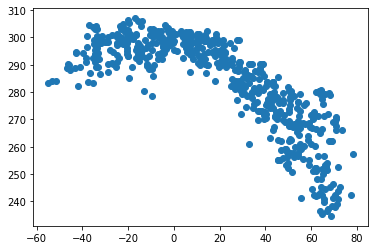

In [29]:
plt.scatter(dfw["Lat"],dfw["Max Temp"])

Latitude vs. Humidity Plot

#### Latitude vs. Humidity Plot

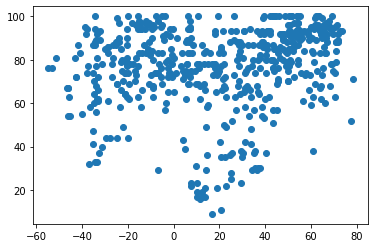

In [34]:
plt.scatter(dfw["Lat"], dfw["Humidity"])

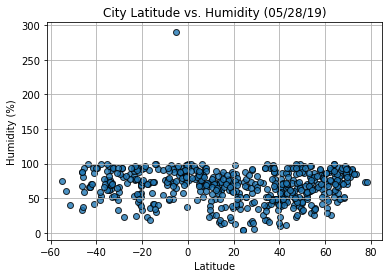

#### Latitude vs. Cloudiness Plot

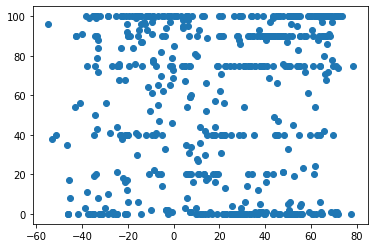

In [35]:
plt.scatter(dfw["Lat"], dfw["Cloudiness"])

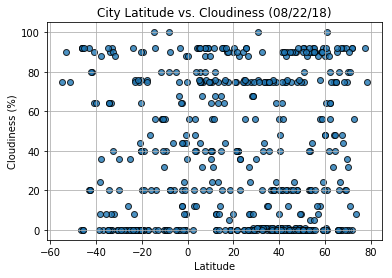

#### Latitude vs. Wind Speed Plot

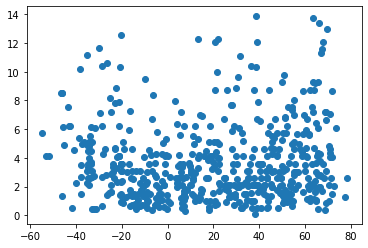

In [36]:
plt.scatter(dfw["Lat"], dfw["Wind Speed"])

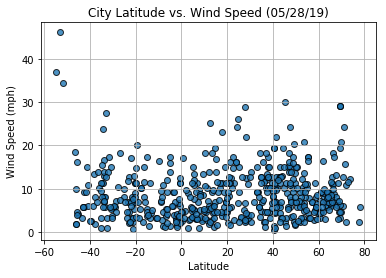

## Linear Regression

In [39]:
# OPTIONAL: Create a function to create Linear Regression plots
def l_reg(x_values, y_values, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.show()

In [40]:
# Create Northern and Southern Hemisphere DataFrames
north_dfw = dfw.loc[(dfw['Lat'] >=0)]
south_dfw = dfw.loc[(dfw['Lat'] <0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

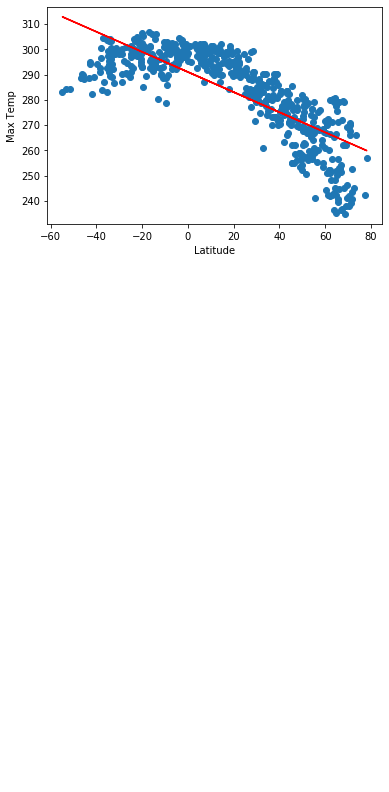

In [41]:
x_values = dfw['Lat']
y_values = dfw['Max Temp']
l_reg(x_values, y_values, "Max Temp")

The r-squared is: -0.8151657406810827


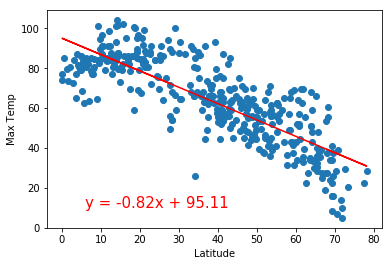

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.760263355051646


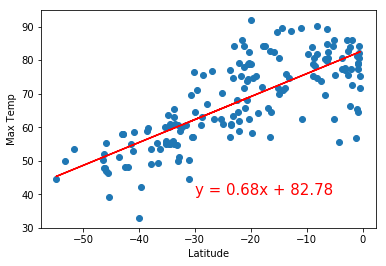

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10358336015746494


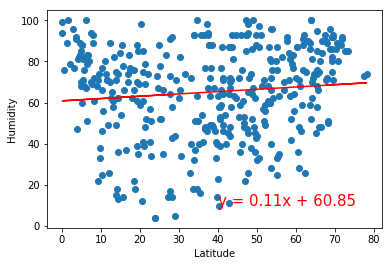

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14689473425583055


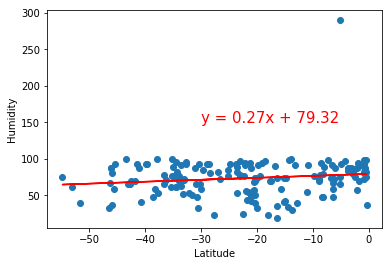

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.08733547918934018


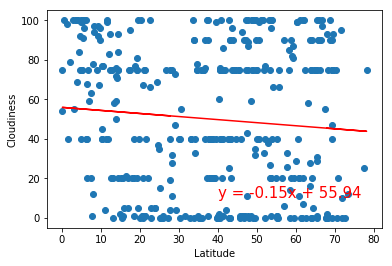

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.21881426893991618


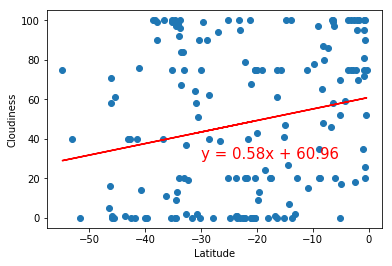

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1071382774388479


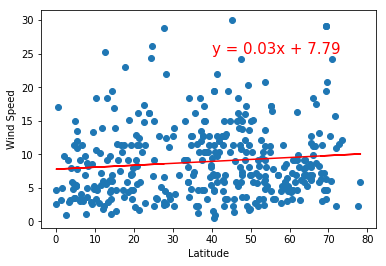

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.322483077139538


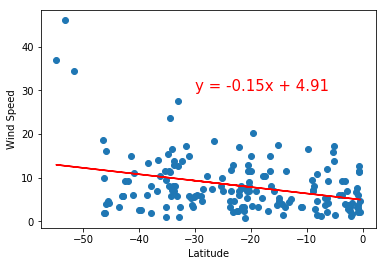